<a href="https://colab.research.google.com/github/JossefaRodriguez/VehiculosUsadosCore/blob/main/Predicci%C3%B3n_de_Precios_de_Veh%C3%ADculos_Usados_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos basados en árbol / Predicción de Precios de Vehículos Usados (Core)


**1.  Carga y Exploración de Datos**



In [367]:
# Importar Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [289]:
# Conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
# Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE3/vehicles_sample_min.csv")

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  size          1420 non-null   object 
 17  type          3961 non-null   object 
 18  paint_color   3507 non-null 

## 2. Limpieza y Preprocesamiento

In [292]:
"""
En primera instancia, se verificaran los valores nulos existentes, aunque con la primera visualización ya podemos
visualizar una gran cantidad de datos faltantes por columna, asi que se analizará cada una de ellas
"""
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,12
manufacturer,195
model,60
condition,2047
cylinders,2054


In [293]:
"""
existen 20 columnas con datos restantes, una de las mas significativas es county, que al analizarla es la columna que hace
referencia al condado, pero que fue dejada por error segun el diccionario por ende lo primero que se hará sera eliminarla
"""
df.drop(columns=['county'], inplace=True)

In [294]:
# se verifica el borrado de la columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  size          1420 non-null   object 
 17  type          3961 non-null   object 
 18  paint_color   3507 non-null 

In [295]:
# Otra columna a eliminar debido a que cuenta con aproximadamente el 72% de la data nula es 'size' ya que al imputar bajo cualquier parametro, no seria representativo
df.drop(columns=['size'], inplace=True)

In [296]:
# Se verifica el cambio
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  type          3961 non-null   object 
 17  paint_color   3507 non-null   object 
 18  image_url     5000 non-null 

,0
id,0
url,0
region,0
region_url,0
price,0
year,12
manufacturer,195
model,60
condition,2047
cylinders,2054


In [297]:
"""
Analizando las columnas, existe redundancia respecto a lo que se refiere a region, existe 'region', 'region url' y 'state',
por lo que para este caso solo utilizaré state, quien hace mejor referencia y se eliminará las dos restantes que para este caso no aportan mayor informacion
"""
df.drop(columns=['region', 'region_url' ], inplace=True)

In [298]:
# Se comprueba el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   price         5000 non-null   int64  
 3   year          4988 non-null   float64
 4   manufacturer  4805 non-null   object 
 5   model         4940 non-null   object 
 6   condition     2953 non-null   object 
 7   cylinders     2946 non-null   object 
 8   fuel          4961 non-null   object 
 9   odometer      4943 non-null   float64
 10  title_status  4901 non-null   object 
 11  transmission  4973 non-null   object 
 12  VIN           3115 non-null   object 
 13  drive         3528 non-null   object 
 14  type          3961 non-null   object 
 15  paint_color   3507 non-null   object 
 16  image_url     5000 non-null   object 
 17  description   5000 non-null   object 
 18  state         5000 non-null 

In [299]:
# Otra de las columnas que no aportan mayor informacion es latitud y longitud ya que trabajaremos solo con state y con eso ya se reconoce a donde pertenece
df.drop(columns=['lat', 'long' ], inplace=True)

In [300]:
# Se verifica el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   price         5000 non-null   int64  
 3   year          4988 non-null   float64
 4   manufacturer  4805 non-null   object 
 5   model         4940 non-null   object 
 6   condition     2953 non-null   object 
 7   cylinders     2946 non-null   object 
 8   fuel          4961 non-null   object 
 9   odometer      4943 non-null   float64
 10  title_status  4901 non-null   object 
 11  transmission  4973 non-null   object 
 12  VIN           3115 non-null   object 
 13  drive         3528 non-null   object 
 14  type          3961 non-null   object 
 15  paint_color   3507 non-null   object 
 16  image_url     5000 non-null   object 
 17  description   5000 non-null   object 
 18  state         5000 non-null 

In [301]:
"""
Analizando, otras columnas que no aporta mayor informacion para los modelos de prediccion es la url de la imagen del vehiculo, que aparte no funciona por ende se eliminará
asi como tambien la columna 'description' que es irrelevante, tambien el VIN, que si bien es un dato relevante del vehiculo pero no asi para la predicción, asi como tambien el
"""
df.drop(columns=['image_url', 'description', 'VIN' ], inplace=True)

In [302]:
# Se verifican los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   price         5000 non-null   int64  
 3   year          4988 non-null   float64
 4   manufacturer  4805 non-null   object 
 5   model         4940 non-null   object 
 6   condition     2953 non-null   object 
 7   cylinders     2946 non-null   object 
 8   fuel          4961 non-null   object 
 9   odometer      4943 non-null   float64
 10  title_status  4901 non-null   object 
 11  transmission  4973 non-null   object 
 12  drive         3528 non-null   object 
 13  type          3961 non-null   object 
 14  paint_color   3507 non-null   object 
 15  state         5000 non-null   object 
 16  posting_date  5000 non-null   object 
dtypes: float64(2), int64(2), object(13)
memory usage: 664.2+ KB


In [303]:
# Por ultimo se eliminará la columna url ya que no aporta mayor relevancia al modelo
df.drop(columns=['url'], inplace=True)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   price         5000 non-null   int64  
 2   year          4988 non-null   float64
 3   manufacturer  4805 non-null   object 
 4   model         4940 non-null   object 
 5   condition     2953 non-null   object 
 6   cylinders     2946 non-null   object 
 7   fuel          4961 non-null   object 
 8   odometer      4943 non-null   float64
 9   title_status  4901 non-null   object 
 10  transmission  4973 non-null   object 
 11  drive         3528 non-null   object 
 12  type          3961 non-null   object 
 13  paint_color   3507 non-null   object 
 14  state         5000 non-null   object 
 15  posting_date  5000 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usage: 625.1+ KB


In [305]:
# Se realiza la consulta para filtrar solo las filas que contienen algun valor null y analizar cada uno de ellos para ver que procede
df[df.isnull().any(axis=1)]


,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
1,7314599643,27995,2006.0,chevrolet,corvette,good,8 cylinders,gas,NaN,clean,manual,rwd,convertible,black,il,2021-04-29T18:46:35-0500
2,7308399808,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,gas,30200.0,clean,automatic,rwd,convertible,NaN,ar,2021-04-17T14:01:33-0500
3,7312663807,14000,2013.0,bmw,328i,NaN,NaN,gas,92965.0,clean,automatic,NaN,NaN,NaN,oh,2021-04-25T23:53:42-0400
4,7315368523,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,other,47105.0,clean,automatic,NaN,NaN,black,or,2021-05-01T10:04:24-0700
8,7316972938,22991,2016.0,ford,mustang,NaN,4 cylinders,gas,79631.0,clean,automatic,rwd,other,custom,nc,2021-05-04T18:02:04-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7316994143,800,2004.0,honda,accord,NaN,NaN,gas,195000.0,clean,automatic,NaN,NaN,NaN,ok,2021-05-04T17:47:08-0500
4994,7315500423,0,2014.0,jeep,wrangler unlimited sahara 4dr hardtop,NaN,6 cylinders,gas,109146.0,clean,automatic,4wd,SUV,grey,az,2021-05-01T13:54:16-0700
4996,7317007568,2300,1987.0,toyota,pickup,NaN,NaN,gas,135000.0,clean,manual,NaN,NaN,NaN,tn,2021-05-04T19:16:49-0400
4998,7314437243,68777,2020.0,volvo,"xc90 t8 1,300 miles",excellent,NaN,gas,1375.0,clean,automatic,4wd,SUV,NaN,ca,2021-04-29T11:30:36-0700


In [306]:
# Teniendo mas menos limpio, volvemos a consultar los nulos para analizar la siguiente accion
df.isna().sum()

,0
id,0
price,0
year,12
manufacturer,195
model,60
condition,2047
cylinders,2054
fuel,39
odometer,57
title_status,99


In [307]:
# Se comenzará con la columna 'year' y debido a que es un numero bajo de valores nulos, se eliminarán
df.dropna(subset=['year'], inplace=True)

In [308]:
# Se verifica el borrado
df.isna().sum()

,0
id,0
price,0
year,0
manufacturer,183
model,60
condition,2035
cylinders,2054
fuel,35
odometer,57
title_status,95


In [309]:
# En el caso de manofactura se imputarán los valores nulos con no registrado, ya que imputar por valores arbitrarios podría incidir en la prediccion
df['manufacturer'].fillna('No Registrado', inplace=True)

/tmp/ipython-input-309-3750751088.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['manufacturer'].fillna('No Registrado', inplace=True)


In [310]:
# Se revisan los cambios
df['manufacturer'].value_counts()['No Registrado']


np.int64(183)

In [311]:
# Se analizarán valores que no corresponden en la columna model, bajo analisis no existirian datos erroneos
modelos_unicos = df['model'].dropna().unique()
print(len(modelos_unicos))
print(sorted(modelos_unicos))

2214
['09 HONDS ODYSSEY EXL', '1 series 128i convertible 2d', '1 series 128i coupe 2d', '124 spider', '124 spider classica', '124 spider lusso', '128 sport package', '128i', '128i coupe', '1400', '1500', '1500 4x4', '1500 bighorn 4x4 gas', '1500 classic crew cab', '1500 classic quad cab', '1500 classic regular cab', '1500 classic warlock', '1500 crew cab', '1500 crew cab big horn', '1500 crew cab express pickup', '1500 crew cab laramie', '1500 crew cab laramie pickup', '1500 crew cab rebel pickup', '1500 crew cab tradesman', '1500 laramie', '1500 laramie 4x4 gas', '1500 laramie slt', '1500 limited', '1500 limited crewcab leveled', '1500 lone star', '1500 lone star automatic', '1500 longhorn 4x4 gas', '1500 lt crew cab', '1500 quad cab', '1500 quad cab lone star', '1500 rebel', '1500 rebel 4x4 1/2 ton', '1500 sierra', '1500 slt', '1500 slt 4x4 big horn', '1500 sport 4x4 5.7 v8 loaded lifted on 37s', '1500 tradesman rwd gas', '1500 truck american truck', '1949 Diamond T 201', '1950 Stude

In [312]:
# Para el caso de model, donde existen 60 valores nulos, se imputará por la moda de manofactura o fabricante y si no se encuentra se imputa con no registrado

df['model'] = df.groupby('manufacturer')['model'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'no registrado')
)



In [313]:
# Se verifica el cambio
df.isna().sum()

,0
id,0
price,0
year,0
manufacturer,0
model,0
condition,2035
cylinders,2054
fuel,35
odometer,57
title_status,95


In [314]:
# Se contabilizan cuantos quedaron como no registrado y según todos se imputaron segun la moda del fabricante
df[df['model'] == 'no registrado']


,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date


In [315]:
df.sample(n=10)

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
2929,7307892468,20995,2012.0,jaguar,xk,excellent,8 cylinders,gas,81558.0,clean,automatic,rwd,coupe,black,fl,2021-04-16T15:42:23-0400
4165,7316587147,43500,2018.0,chevrolet,silverado 4x4 ltz,like new,8 cylinders,gas,66000.0,clean,automatic,4wd,truck,white,az,2021-05-03T20:49:57-0700
4585,7315604285,1450,1996.0,honda,accord,good,6 cylinders,gas,175000.0,clean,automatic,fwd,sedan,silver,il,2021-05-01T20:19:23-0500
2278,7314011688,19346,2016.0,ford,transit t-150,excellent,6 cylinders,gas,114699.0,clean,automatic,rwd,van,white,pa,2021-04-28T16:11:33-0400
2065,7304375708,14500,2017.0,volkswagen,passat,excellent,4 cylinders,gas,65000.0,clean,automatic,fwd,sedan,silver,ca,2021-04-09T13:55:45-0700
611,7316516059,41995,2019.0,toyota,tacoma double cab,NaN,6 cylinders,gas,69331.0,clean,automatic,4wd,pickup,custom,tx,2021-05-03T19:03:13-0500
438,7310001378,9995,2014.0,toyota,tacoma,NaN,NaN,gas,224974.0,clean,automatic,NaN,truck,white,nc,2021-04-20T16:04:11-0400
662,7316385814,7500,2011.0,mercury,milan,like new,4 cylinders,gas,89000.0,clean,automatic,NaN,sedan,grey,oh,2021-05-03T15:50:00-0400
1785,7316922191,11999,2006.0,ram,1500,excellent,8 cylinders,gas,127338.0,clean,automatic,rwd,pickup,grey,ca,2021-05-04T13:26:33-0700
3569,7312229864,19640,2015.0,mercedes-benz,m-class,NaN,6 cylinders,gas,89868.0,clean,automatic,rwd,SUV,silver,tn,2021-04-25T01:46:32-0400


In [316]:
# para el caso de las demas columnas con valores nulos, se imputará por la moda de las mismas columnas correspondientes en caso de no, se imputará como desconocido

col_nan = ['condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
df[col_nan]= df[col_nan].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Desconocido'))


In [317]:
df.isna().sum()

,0
id,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0


In [318]:
# Se analizan la existencia de duplicados, no existen
df.duplicated().sum()

np.int64(0)

##  3. Exploración de Datos:

In [319]:
df['price'].unique()

array([36990, 27995, 78423, ..., 84477, 12400,  6300])

In [320]:
df.describe()

,id,price,year,odometer
count,4.988000e+03,4.988000e+03,4988.000000,4.988000e+03
mean,7.311498e+09,1.840081e+04,2011.389334,1.006344e+05
std,4.397452e+06,3.156328e+04,9.071645,2.782373e+05
min,7.301598e+09,0.000000e+00,1927.000000,0.000000e+00
25%,7.308131e+09,5.995000e+03,2009.000000,3.785975e+04
50%,7.312712e+09,1.390000e+04,2014.000000,8.387400e+04
75%,7.315281e+09,2.652250e+04,2017.000000,1.340050e+05
max,7.317089e+09,1.234567e+06,2022.000000,9.999999e+06


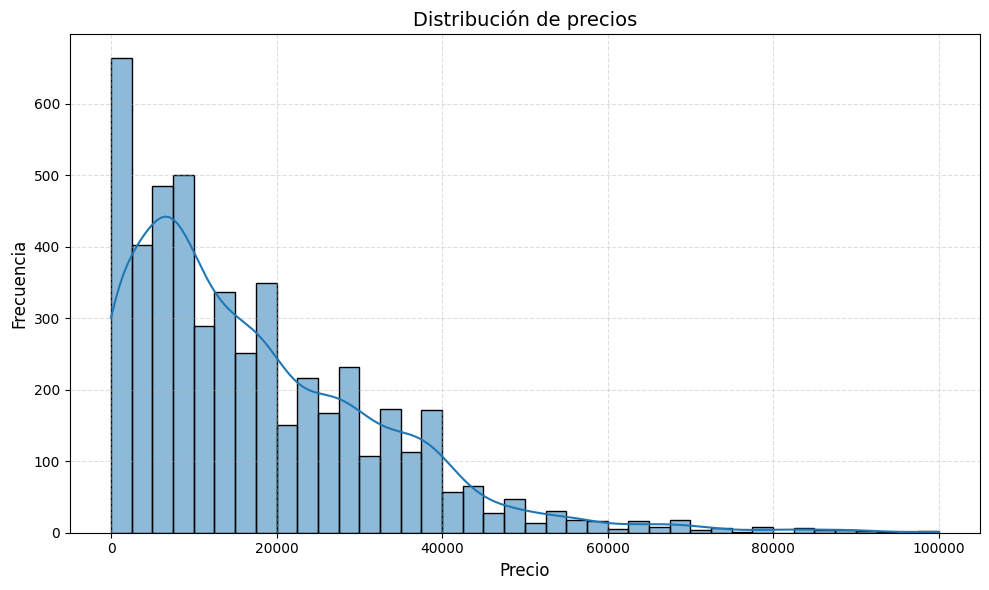

In [321]:
# Se crea un histograma de la variable precios
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 100000]['price'], bins=40, kde=True)

plt.title('Distribución de precios', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

- Analisis

-La mayoría de los vehículos tiene precios por debajo de los 20,000. Esto se refleja en la enorme barra en ese rango y sugiere un mercado dominado por autos económicos o usados.
- A medida que el precio aumenta, la frecuencia de vehículos en esos rangos cae rápidamente. Muy pocos superan los 60,000.

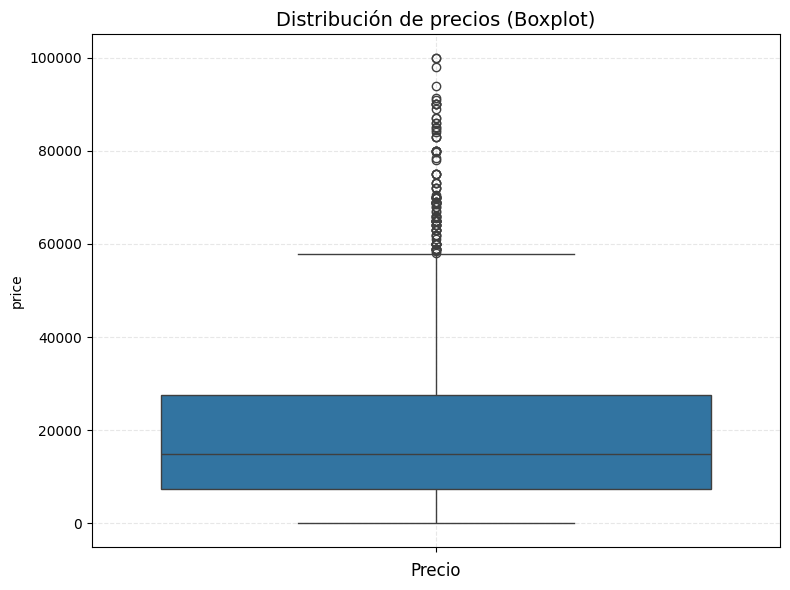

In [362]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[df['price'] < 100000]['price'])

plt.title('Distribución de precios (Boxplot)', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


- Analisis
La mediana se encunetra cerca de los 18.000. Es el valor central, donde se concentra la mitad de los precios.

- Outliers (valores atípicos): Hay bastantes precios que superan los 60,000, e incluso algunos llegan hasta los 100,000. Esto sugiere modelos premium o raros dentro del conjunto.
- La mayoría de los vehículos tienen precios bajos, lo que podría implicar que el mercado incluye muchos autos usados o económicos.

In [342]:
df['price'].max()

1234567

In [360]:
# Debido a que en el grafico podemos visualizar asi como tambien en el resumen estadistico valores fuera de rango, procederemos a eliminarlos ya que podran afectar la predicción

# Se detenctan  outliers por indice
outliers_price = df[(df['price'] > 100000) | (df['price'] == 0)].index
# Se eliminan
df.drop(index=outliers_price, inplace=True)

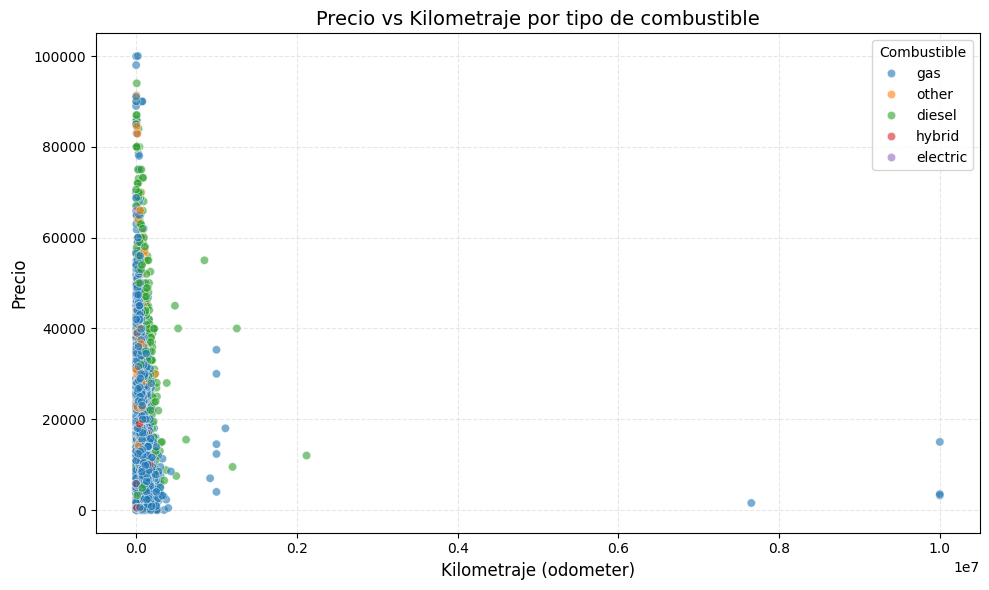

In [361]:
# Se crea un grafico de dispersion para ver como influye el kilometraje y el tipo de combustible en el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', hue='fuel', alpha=0.6)

plt.title('Precio vs Kilometraje por tipo de combustible', fontsize=14)
plt.xlabel('Kilometraje (odometer)', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(title='Combustible')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


- Analisis
La mayoría de los puntos está agrupada en el rango bajo de kilometraje (menos de ~100,000 km), lo cual sugiere que muchos vehículos son poco usados, exceptuando por algunos valores altos.
Hay una tendencia decreciente que a mayor kilometraje, menor precio.


/tmp/ipython-input-363-635178984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition', y='price', palette='Pastel1')


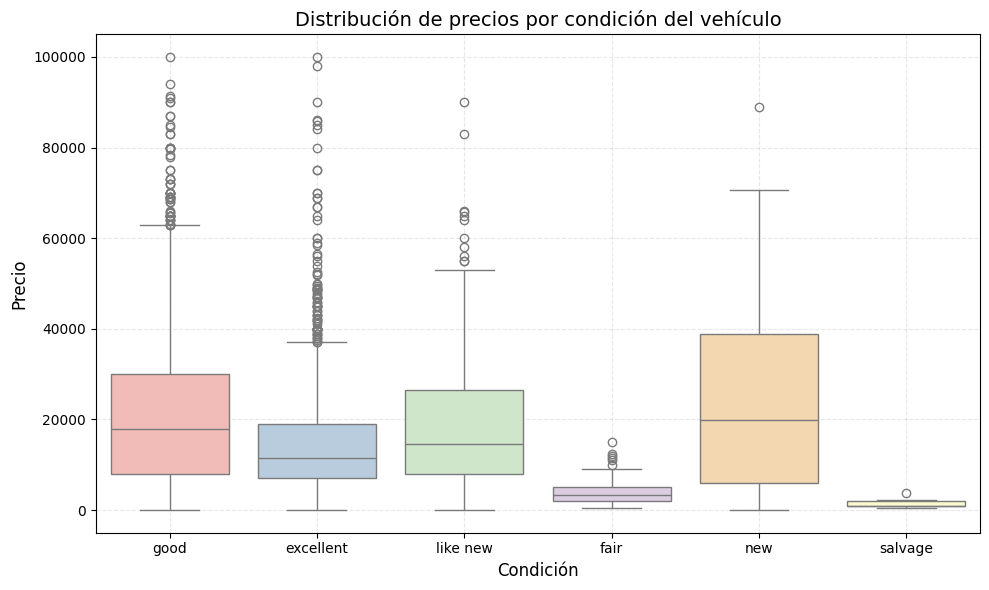

In [363]:
# Se crea un grafico boxplot para comparar la variacion del precio segun estado del auto, mostrando rangos, medianas y valores atípicos.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='condition', y='price', palette='Pastel1')

plt.title('Distribución de precios por condición del vehículo', fontsize=14)
plt.xlabel('Condición', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##  4. Modelado y Evaluación



In [348]:
# Dividir data en features y target.
X = df.drop(columns="price")
y = df["price"]

In [349]:
# Separar variables.
num_cols = ['year', 'odometer']
nom_cols = ['manufacturer', 'model', 'cylinders', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'posting_date']


In [350]:
# Split Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo Regresion Lineal

In [351]:
# Preprocesador para regresion lineal
preprocesador_rl = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

In [352]:
# Modelo regresion lineal
modeloRL = Pipeline(steps=[
    ('preprocesamiento', preprocesador_rl),
    ('regresion', LinearRegression())
])

# Entrenar modelo
modeloRL.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'condition',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state',
                                                   'posting_date'])])),
                ('regresion', LinearRegression())])

In [353]:
# Prediccion
y_pred_rl = modeloRL.predict(X_test)

In [354]:
# Metricas
mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred_rl)

## Modelo RandomForest Regressor

In [355]:
# Preprocesador para RandomForest
preprocesador_rf = ColumnTransformer(transformers=[
    ('num', 'passthrough', num_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), nom_cols)
])

In [356]:
# Modelo RandomForest
modeloRF = Pipeline(steps=[
    ('preprocesamiento', preprocesador_rf),
    ('regresor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar Modelo
modeloRF.fit(X_train, y_train)


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'condition',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state',
                                                   'posting_date'])])),
                ('regresor', RandomForestRegressor(random_state=42))])

In [357]:
# Prediccion
y_pred_rf = modeloRF.predict(X_test)

In [365]:
# Metricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [366]:
# Comparación entre ambos modelos

comparacion = pd.DataFrame({
    'Modelo': ['Modelo Regresion Lineal', 'Modelo RandomForest Regressor'],
    'MSE': [mse_rl, mse_rf],
    'RMSE': [rmse_rl, rmse_rf],
    'R²': [r2_rl, r2_rf]
})

print(comparacion)

                          Modelo           MSE          RMSE        R²
0        Modelo Regresion Lineal  1.214809e+08  11021.836090  0.419934
1  Modelo RandomForest Regressor  8.742197e+07   9349.971817  0.582564


segun el resultado de las metricas, Random Forest Regressor supera manteniendo un menor error de predicción promedio (RMSE) y cuadrático (MSE). Un R² de 0.58 indica que este modelo explica el 58% de la variabilidad del precio, mientras que el modelo lineal solo el 42%.

## Optimizacion del modelo

In [385]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Model.
pipeline_forest = Pipeline([
    ("pp", preprocessor_forest),
    ("model", RandomForestRegressor( n_estimators=100, max_depth=25, random_state=42))
])

In [386]:
# Optimizacion de hiperparametros.
forest_params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None]
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=10, scoring="r2", n_jobs=-1)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['year',
                                                                          'odometer'])])),
                                       ('model',
                                        RandomForestRegressor(max_depth=25,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__n_estimators': [50, 100, 200]},
             scoring='r2')

In [387]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest))

Forest Regressor
Mejores parámetros: {'model__max_depth': 10, 'model__n_estimators': 200}
R²: 0.28865130016218254


# Tras la optimizacion del modelo, se intento solo con model_n_estimator y lanzo un valor muy bajo de R2, se agrega max_depth y si bien se noto un cambio significativo, este no logra alcanzar los valores obtenidos con randomforest antes de la optimización.